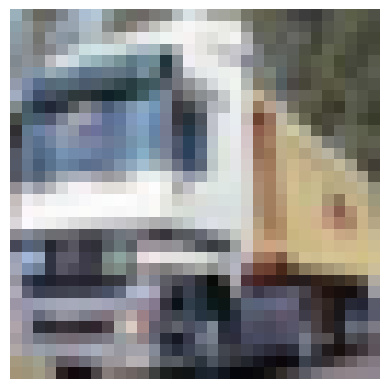

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10


# Cargar el dataset CIFAR-10 como ejemplo
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Seleccionar una imagen del dataset de entrenamiento
imagen = x_train[1]

# Mostrar la imagen original
plt.imshow(imagen)
plt.axis('off')
plt.show()



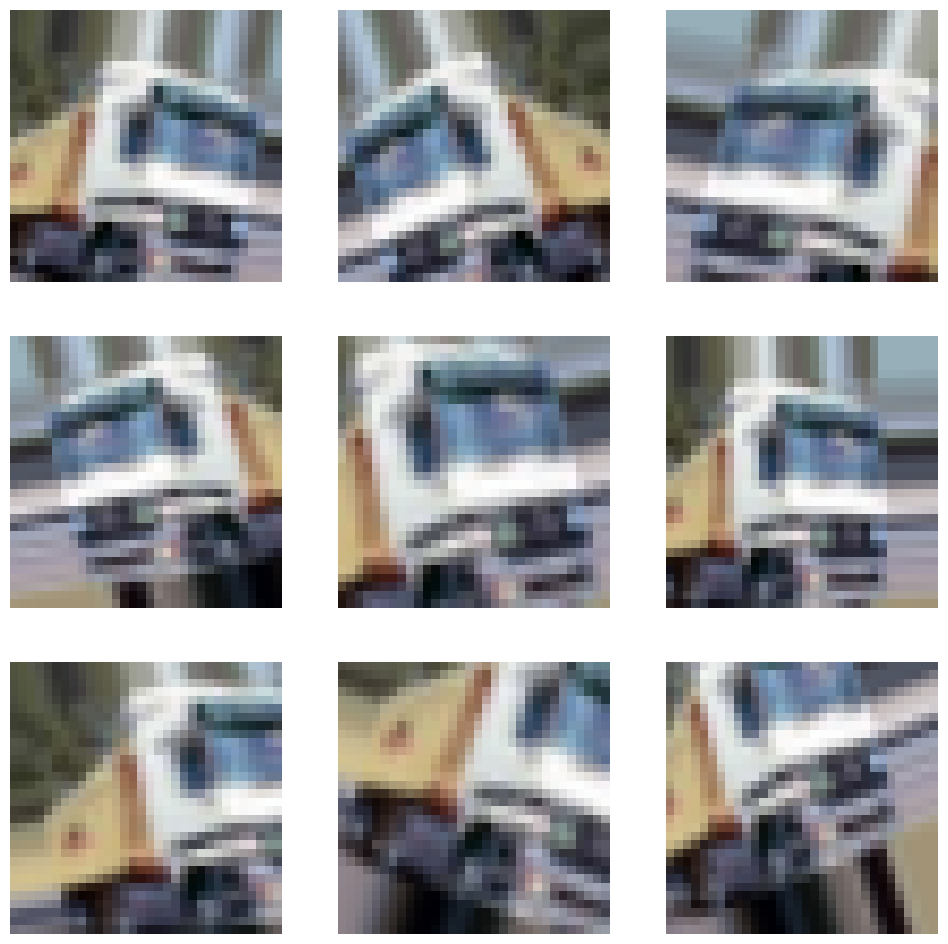

In [ ]:
# Ajustar las dimensiones de la imagen
imagen = imagen.reshape((1,) + imagen.shape)  # Convertir la imagen en un lote de tamaño 1


def mostrar_imagenes_aumentadas(imagen):
    # Crear un generador de aumento de datos
    datagen = ImageDataGenerator(
        rotation_range=20,          # Rotación aleatoria hasta 20 grados
        width_shift_range=0.2,      # Desplazamiento horizontal
        height_shift_range=0.2,     # Desplazamiento vertical
        shear_range=0.2,            # Transformación de cizalla
        zoom_range=0.2,             # Zoom aleatorio
        horizontal_flip=True,       # Inversión horizontal
        fill_mode='nearest'         # Relleno de los huecos generados
    )

    # Crear un flujo de imágenes aumentadas
    i = 0
    plt.figure(figsize=(12, 12))
    for imagen_aumentada in datagen.flow(imagen, batch_size=1):
        i += 1
        plt.subplot(3, 3, i)
        plt.imshow(array_to_img(imagen_aumentada[0]))
        plt.axis('off')
        if i >= 9:  # Mostrar 9 imágenes aumentadas
            break
    plt.show()

# Llamada al método para visualizar imágenes aumentadas
mostrar_imagenes_aumentadas(imagen)


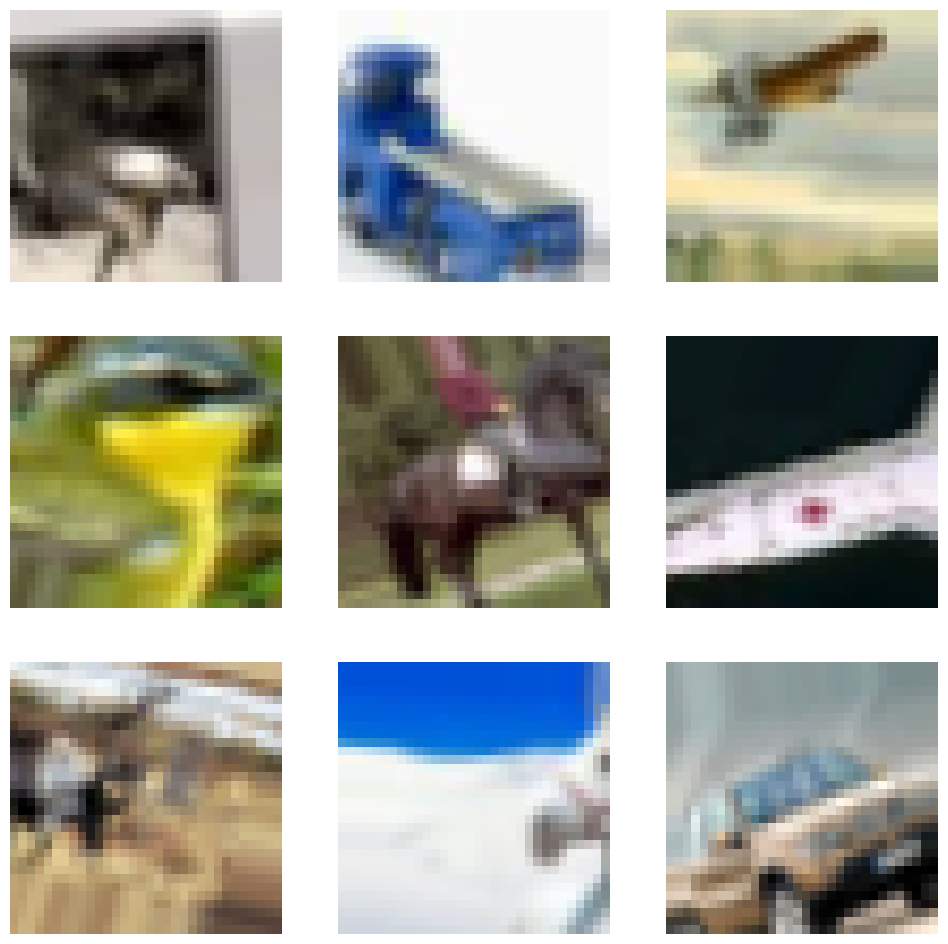

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
import numpy as np



# Cargar el dataset CIFAR-10 como ejemplo
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Crear un generador de aumento de datos para todo el conjunto
augmenter = ImageDataGenerator(
    rotation_range=20,          # Rotación aleatoria hasta 20 grados
    width_shift_range=0.2,      # Desplazamiento horizontal
    height_shift_range=0.2,     # Desplazamiento vertical
    shear_range=0.2,            # Transformación de cizalla
    zoom_range=0.2,             # Zoom aleatorio
    horizontal_flip=True,       # Inversión horizontal
    fill_mode='nearest'         # Relleno de los huecos generados
)

# Aumentar el conjunto de entrenamiento completo
batch_size = 64
augmented_data = augmenter.flow(x_train, y_train, batch_size=batch_size)

# Visualizar algunas imágenes aumentadas del conjunto
x_batch, y_batch = next(augmented_data)
plt.figure(figsize=(12, 12))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(array_to_img(x_batch[i]))
    plt.axis('off')
plt.show()


Escala

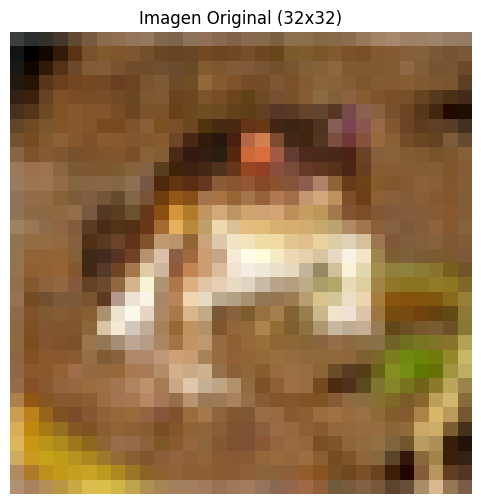

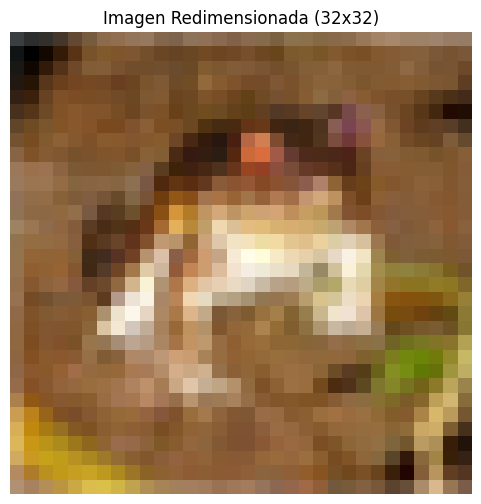

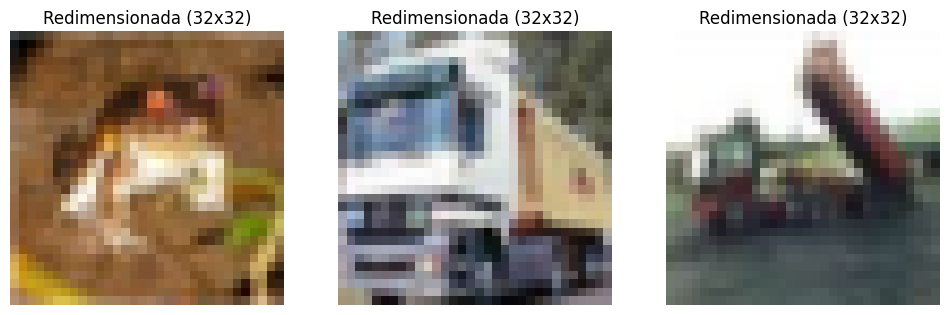

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

# Cargar el dataset CIFAR-10 como ejemplo
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Seleccionar una imagen del dataset de entrenamiento
imagen = x_train[0]

# Mostrar la imagen original
plt.figure(figsize=(6, 6))
plt.imshow(imagen)
plt.title("Imagen Original ({}x{})".format(imagen.shape[0], imagen.shape[1]))
plt.axis('off')
plt.show()

# Cambiar el tamaño de la imagen
nuevo_tamano = (32, 32)  # Especificar el nuevo tamaño (ancho, alto)
imagen_redimensionada = tf.image.resize(imagen, nuevo_tamano)

# Convertir la imagen redimensionada de TensorFlow a un formato que pueda ser mostrado
imagen_redimensionada_np = imagen_redimensionada.numpy().astype('uint8')

# Mostrar la imagen redimensionada
plt.figure(figsize=(6, 6))
plt.imshow(imagen_redimensionada_np)
plt.title("Imagen Redimensionada ({}x{})".format(nuevo_tamano[0], nuevo_tamano[1]))
plt.axis('off')
plt.show()

# Función para cambiar el tamaño de un conjunto de imágenes
def redimensionar_conjunto(imagenes, nuevo_tamano):
    imagenes_redimensionadas = []
    for imagen in imagenes:
        imagen_redimensionada = tf.image.resize(imagen, nuevo_tamano)
        imagenes_redimensionadas.append(imagen_redimensionada.numpy().astype('uint8'))
    return imagenes_redimensionadas

# Redimensionar las primeras 10 imágenes del conjunto de entrenamiento
imagenes_redimensionadas = redimensionar_conjunto(x_train[:10], nuevo_tamano)

# Mostrar las primeras 3 imágenes redimensionadas
plt.figure(figsize=(12, 4))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.imshow(imagenes_redimensionadas[i])
    plt.title("Redimensionada ({}x{})".format(nuevo_tamano[0], nuevo_tamano[1]))
    plt.axis('off')
plt.show()


# Resnet

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Cargar el dataset CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalizar las imágenes
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convertir las etiquetas a una codificación categórica (one-hot encoding)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Definir la arquitectura del modelo usando ResNet50 como base
entrada = Input(shape=(32, 32, 3))
resnet_base = ResNet50(include_top=False, weights=None, input_tensor=entrada, input_shape=(32, 32, 3))

# Añadir capas adicionales para adaptar al conjunto CIFAR-10
x = Flatten()(resnet_base.output)
x = Dense(512, activation='relu')(x)
salida = Dense(10, activation='softmax')(x)

# Definir el modelo completo
modelo = Model(inputs=entrada, outputs=salida)

# Compilar el modelo
modelo.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
historial = modelo.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=64)

# Graficar la precisión y la pérdida durante el entrenamiento
plt.figure(figsize=(12, 4))

# Gráfica de la precisión
plt.subplot(1, 2, 1)
plt.plot(historial.history['accuracy'], label='Entrenamiento')
plt.plot(historial.history['val_accuracy'], label='Validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.title('Precisión durante el entrenamiento')

# Gráfica de la pérdida
plt.subplot(1, 2, 2)
plt.plot(historial.history['loss'], label='Entrenamiento')
plt.plot(historial.history['val_loss'], label='Validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Pérdida durante el entrenamiento')

plt.show()


Epoch 1/10
782/782 [==============================] - 235s 280ms/step - loss: 1.7140 - accuracy: 0.3888 - val_loss: 2.1047 - val_accuracy: 0.3664
Epoch 2/10
782/782 [==============================] - 217s 277ms/step - loss: 1.4071 - accuracy: 0.4962 - val_loss: 2.1269 - val_accuracy: 0.3070
Epoch 3/10
233/782 [=======>......................] - ETA: 2:24 - loss: 1.3015 - accuracy: 0.5310